In [545]:
import glob
import pandas as pd
import mne
import matplotlib.pyplot as plt
from io import StringIO
import mne
from mne.io import read_raw_eeglab, read_epochs_eeglab
import numpy as np
from scipy import signal
from scipy import fftpack
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm, tqdm_notebook
import math

from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from keras_tqdm import TQDMNotebookCallback
from tensorboard.plugins.hparams import api as hp
from livelossplot.tf_keras import PlotLossesCallback

import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import multiprocessing
from tpot import TPOTRegressor
from oct2py import octave

from joblib import Parallel, delayed
import multiprocessing
from joblib import wrap_non_picklable_objects
import json
import pickle
import os.path
from mpl_toolkits.mplot3d import axes3d
import timeit
from skimage.transform import resize
from timeit import default_timer as timer
from datetime import timedelta
import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.models import Model, load_model
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.utils import plot_model

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod import bayes_mixed_glm as glm

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV

from spectrum import arburg, arma2psd
import pylab

In [546]:
eeglab_path = '/home/raquib/Documents/MATLAB/eeglab2019_0/functions/'
octave.addpath(eeglab_path + 'guifunc')
octave.addpath(eeglab_path + 'popfunc')
octave.addpath(eeglab_path + 'adminfunc')
octave.addpath(eeglab_path + 'sigprocfunc')
octave.addpath(eeglab_path + 'miscfunc')

'.:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/sigprocfunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/adminfunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/popfunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/guifunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/miscfunc:/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/oct2py:/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/octave_kernel:/usr/lib/x86_64-linux-gnu/octave/4.2.2/site/oct/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/api-v51/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/x86_64-pc-linux-gnu:/usr/share/octave/4.2.2/site/m:/usr/share/octave/site/api-v51/m:/usr/share/octave/site/m:/usr/share/octave/site/m/startup:/usr/lib/x86_64-linux-gnu/octave/4.2.2/oct/x86_64-pc-linux-gnu:/usr/share/octave/4.2.2/m:/usr/share/octave/4.2.2/m/audio:/usr/share/octave/4.2.2/m/debian:/usr/share/octave/4.2.2/m/deprecated:/usr/share/octave/4.2.2/m

In [547]:
eegs = ['data/original/sub03/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub03/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub03/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
 'data/original/sub03/exp02/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub03/exp02/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub03/exp03/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub03/exp03/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub03/exp03/eeg/SP 110RMT r3/05-clean-prestimulus.set',
 'data/original/sub04/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub04/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub04/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
 'data/original/sub05/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub05/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub05/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
 'data/original/sub06/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub06/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub06/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
 'data/original/sub06/exp02/eeg/SP 110RMT/05-clean-prestimulus.set',
 'data/original/sub07/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub07/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub07/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
 'data/original/sub08/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub08/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub08/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
 'data/original/sub08/exp02/eeg/SP 110RMT/05-clean-prestimulus.set',
 'data/original/sub08/exp03/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub08/exp03/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub08/exp03/eeg/SP 110RMT r3/05-clean-prestimulus.set',
 'data/original/sub09/exp01/eeg/SP 110RMT/05-clean-prestimulus.set',
 'data/original/sub10/exp01/eeg/SP 110RMT/05-clean-prestimulus.set',
 'data/original/sub10/exp02/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub10/exp02/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub10/exp02/eeg/SP 110RMT r3/05-clean-prestimulus.set',
 'data/original/sub11/exp01/eeg/SP 110RMT/05-clean-prestimulus.set',
 'data/original/sub11/exp02/eeg/SP 110RMT/05-clean-prestimulus.set',
 'data/original/sub12/exp01/eeg/SP 110RMT/05-clean-prestimulus.set',
 'data/original/sub12/exp02/eeg/SP 110RMT/05-clean-prestimulus.set',
#  'data/original/sub13/exp01/eeg/SP 110RMT/05-clean-prestimulus.set', # LEFT HANDED
 'data/original/sub14/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub15/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub15/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub15/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
 'data/original/sub16/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub16/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub16/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set'
]

 # Read and process EEG

In [548]:
def read_eeg(path):
    eeg = octave.pop_loadset(path)
    new_trial_list = []
    for i in range(eeg.data.shape[2]):
        trial = eeg.data[:, :, i]
        time = np.linspace(-1000, 0, num=trial.shape[1])
        trial = pd.DataFrame(np.transpose(trial), columns=eeg.chanlocs.labels[0])
        trial['time'] = time
        new_trial_list.append(trial)
    return new_trial_list

def crop_trials(trial_list, duration_millis=500, sampling_rate=2048):
    new_trial_list = []
    for trial in trial_list:
        samples_to_pick = duration_millis * sampling_rate / 1000
        new_trial_list.append(trial.tail(int(samples_to_pick)))
    return new_trial_list, samples_to_pick

def band_max(freq, psd, interval):
    indices = []
    for el in freq:
        indices.append(el in interval)
    freq = freq[indices]
    psd = psd[indices]
    if (len(psd) == 0):
        return 0, 0
    i = np.argmax(np.abs(psd))
    return freq[i], psd[i]

def crop_mep_region(mep_frame):
    crop_start = 0.211
    crop_end = 0.4
    multiplier = 7499 / 1.4998
    start = int(crop_start * multiplier)
    end = int(crop_end * multiplier)
    mep_cropped = mep_frame.iloc[start:end, :]
    time = mep_frame.iloc[start:end, :]
    return mep_cropped, time

def get_apb_column_name(mep_frame):
    if 'L APB' in mep_frame:
        return 'L APB'
    else:
        return 'APB'

def open_mep_as_df(path):
    fileMep = open(path, "r+")
    mep_frames = fileMep.read().split('\n\n')
    df_list = []
    for mep_frame in mep_frames:
        df_list.append(pd.read_csv(StringIO(mep_frame), '\t'))
    return df_list

def get_mep_path(eeg_path):
    segments = eeg_path.split('/')
    segments[4] = 'mep'
    segments = segments[:-1]
    mep_path = '/'.join(segments) + '/*.txt'
    mep_path = glob.glob(mep_path)[0]
    return mep_path

def calculate_mep_size(mep_frame):
    mep_cropped, time = crop_mep_region(mep_frame)
    apb_name = get_apb_column_name(mep_frame)
    max_row = mep_frame.iloc[mep_cropped.idxmax(axis=0)[apb_name]]
    min_row = mep_frame.iloc[mep_cropped.idxmin(axis=0)[apb_name]]
    mep_size = max_row[apb_name] - min_row[apb_name]
    return mep_size, min_row, max_row

# Read CMAP file.
def read_cmap(path):
    df = pd.read_excel(path, sheet_name='Raw data', header=None)
    cmap = df.iloc[44:df.shape[0]-1, 38:59]
    time = df.iloc[44:df.shape[0]-1, 0]
    df = pd.DataFrame(cmap)
    df['time'] = time
    return df

# Identify CMAP peaks.
def find_cmap_peaks(cmap):
    time = cmap['time']
    mean_clean = cmap.drop('time', axis=1).mean(axis=1)
    mean_clean[0:104*10-1] = 0
    idxmax = mean_clean.idxmax(axis=0)
    idxmax = time[idxmax]
    idxmin = mean_clean.idxmin(axis=0)
    idxmin = time[idxmin]
    max_val = mean_clean.max()
    min_val = mean_clean.min()
    return max_val, min_val

def get_cmap_path(eeg_path):
    segments = eeg_path.split('/')
    segments[4] = 'cmap'
    del segments[5]
    segments = segments[:-1]
    cmap_path = '/'.join(segments) + '/*.xlsx'
    cmap_paths = glob.glob(cmap_path)
    if (len(cmap_paths) == 0):
        print('No CMAP found for ' + cmap_path)
        return ''
    return cmap_paths[0]

def plot_freq_response(sig, time, title=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 3))
    ax1.plot(time/1000, sig)
    ax1.set(xlabel='Time (s)', ylabel="uV")
    ax1.set_title('Signal')
    
    fs = 1000/(time[1] - time[0])
    freq, fft = signal.welch(sig, fs, nperseg=4*fs)
    ax2.semilogy(freq, fft)
    ax2.set(xlabel='Frequency (Hz)', ylabel="Power")
    ax2.set_title('Welch PSD')
    
    fft = np.fft.fft(sig)
    freq = np.fft.fftfreq(len(sig), 1/fs)
    
    ax3.plot(freq, np.angle(fft))
    ax3.set(xlabel='Angle', ylabel="Power")
    ax3.set_title('Angle')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    if title != None:
        plt.suptitle(title)
        
def blackman_harris(sig, time, numtaps, cutoff):
    fs = 1000 / (time[1] - time[0])
    x = np.concatenate((sig, np.ones(int(fs/2)) * sig[-1]))
    b = signal.firwin(numtaps, cutoff, window='blackmanharris', fs=fs)
    filtered = signal.lfilter(b, 1, x)
    delay = 0.5 * (numtaps - 1)
    filtered = filtered[numtaps-1:]
    filtered = filtered[0:int(len(filtered) - delay)]
    return filtered

In [549]:
eeg_path = 'data/original/sub03/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set'
sub = eeg_path.split('/')[2]
exp = eeg_path.split('/')[4]
run = eeg_path.split('/')[5]
trials = read_eeg(eeg_path)
# trials, _ = crop_trials(trials, duration_millis=150)

mep_list = open_mep_as_df(get_mep_path(eeg_path))
mep_sizes = []
for mep_df in mep_list:
    size, _, _ = calculate_mep_size(mep_df)
    mep_sizes.append(size)
    break
    
cmap_max, cmap_min = find_cmap_peaks(read_cmap(get_cmap_path(eeg_path)))
cmap = cmap_max - cmap_min
print('cmap ' + str(cmap))

pop_loadset(): loading file data/original/sub03/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set ...
Reading float file 'data/original/sub03/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.fdt'...
Scaling components to RMS microvolt
cmap 22.161458333333336


In [550]:
trials[0].tail()

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,PO4,PO6,FT7,FT8,TP7,TP8,PO7,PO8,Oz,time
2043,0.526861,14.008364,12.885384,1.639091,38.622379,-0.096748,-12.939293,37.226757,0.018991,-2.690851,...,-17.597303,-17.006136,21.850426,31.218599,-2.210395,-9.251528,-7.696065,-9.051148,-11.819506,-1.954079
2044,4.210691,16.608410,19.792109,5.812439,39.769962,3.272898,-6.126570,43.526653,2.939859,-0.222164,...,-15.832372,-15.067411,24.489859,43.538467,1.438670,-9.720976,-2.963828,-6.817313,-7.547856,-1.465559
2045,7.607852,19.102673,25.855997,9.256953,40.181664,6.147404,-0.155656,48.674351,4.500774,1.650790,...,-14.182097,-13.274439,26.553509,53.779995,4.316743,-10.413480,1.281376,-4.847252,-3.706251,-0.977040
2046,10.592723,21.384649,30.957380,11.975283,40.096359,8.494657,4.831090,52.580994,5.018474,2.983355,...,-12.731676,-11.713286,28.084545,61.822357,6.439298,-11.192201,4.881288,-3.199478,-0.457663,-0.488520
2047,13.102773,23.397709,35.086384,14.026221,39.713467,10.339291,8.821777,55.274132,4.809602,3.867000,...,-11.519047,-10.420064,29.156908,67.743202,7.885037,-11.957980,7.783389,-1.886055,2.137228,0.000000


In [551]:
df = trials[0]
df = df[(df['time'] > -0.5) * (df['time'] < -0.2)]
print(df['C3'].values[0])
print(df['FC1'].values[0])
print(df['C3'].values[0])
print(df['CP1'].values[0])
print(df['C3'].values[0])
print(df['FC5'].values[0])
print(df['C3'].values[0])
print(df['CP5'].values[0])


96.37666
2.983355
96.37666
3.4705734
96.37666
5.018474
96.37666
7.1073236


/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [552]:
df = trials[0]
df = df[(df['time'] > -0.5) * (df['time'] < -0.2)]
hjorth = df['C3'].values[0] - df['FC1'].values[0] + df['C3'].values[0] - df['CP1'].values[0] + df['C3'].values[0] - df['FC5'].values[0] + df['C3'].values[0] - df['CP5'].values[0]
df2 = trials[0] + hjorth
df2['time'] = trials[0]['time'].values
df = df2
df.head()

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,PO4,PO6,FT7,FT8,TP7,TP8,PO7,PO8,Oz,time
0,335.757477,321.350861,309.625549,351.716583,341.672546,348.958893,351.826935,352.863800,374.278442,353.738434,...,377.000488,376.829895,367.793488,358.893280,396.148682,375.940979,399.304565,367.748627,370.655792,-1000.000000
1,334.567200,320.720886,307.852783,349.010071,334.362793,348.083160,350.632568,351.839203,371.622986,353.371399,...,379.873169,379.505493,358.184082,358.836304,395.429382,374.968140,403.594757,370.511505,375.284607,-999.511480
2,333.364929,320.099731,306.136627,346.421509,327.141296,347.305634,349.540466,351.319794,369.262726,353.012299,...,382.677856,382.129639,349.249634,359.175873,395.189148,374.255432,407.811371,373.128540,379.658051,-999.022960
3,332.207123,319.521973,304.547607,344.094940,320.161346,346.742462,348.716949,351.707825,367.484497,352.706329,...,385.399445,384.701782,341.621033,360.291077,395.871033,374.004150,411.948700,375.537384,383.608643,-998.534441
4,331.184692,319.033966,303.160980,342.119354,313.689148,346.486511,348.358246,353.263123,366.473328,352.485687,...,388.039337,387.230042,335.759399,362.416840,397.790375,374.376801,416.074066,377.730988,387.011871,-998.045921


/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 8188 is greater than input length  = 2048, using nperseg = 2048
  .format(nperseg, input_length))


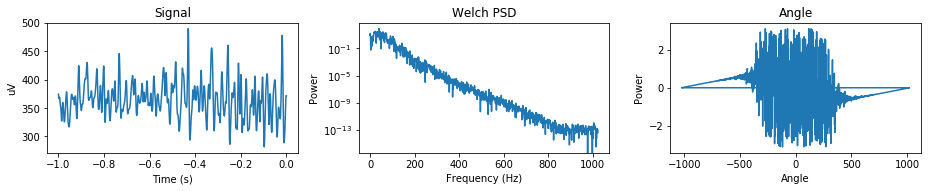

In [553]:
plot_freq_response(df['FC5'], df['time'])

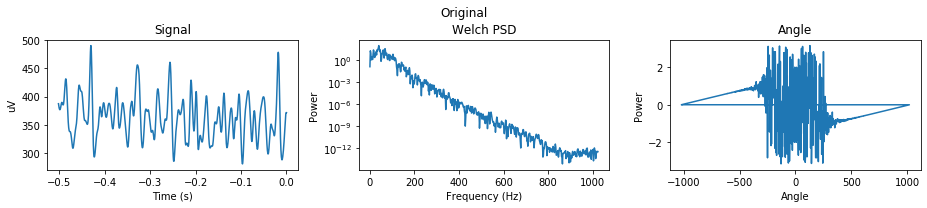

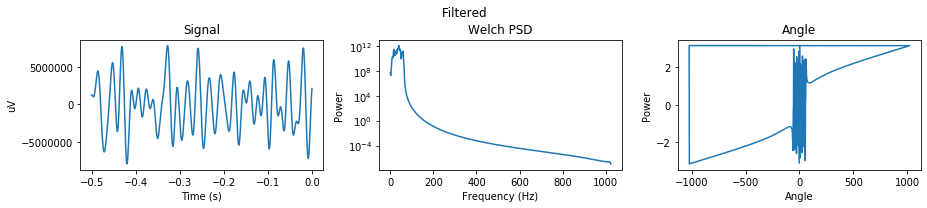

In [575]:
# Blackman Harris
nyq = 0.5 * 2048
N = 1023
fs = 2048
channel = 'FC5'

filtered = blackman_harris(df[channel].values, df['time'], 1023, [0.00001, 8])
filtered = blackman_harris(filtered, df['time'], 1023, 60)

plot_freq_response(df[channel].values[-len(filtered):], df['time'].values[-len(filtered):], 'Original')
plot_freq_response(filtered, df['time'].values[-len(filtered):], 'Filtered')

In [555]:
# Butterworth filter
# def butter_bandpass(x, cutoff, fs=2048, order=4):
#     nyq = 0.5 * fs
#     low = cutoff[0] / nyq
#     high = cutoff[1] / nyq
#     b, a = signal.butter(order, [low, high], btype='band')
#     return signal.lfilter(b, a, x)

# filtered = butter_bandpass(df[channel], [8, 60], order=5)
# plot_freq_response(df[channel].values[-len(filtered):], df['time'].values[-len(filtered):], 'Original')
# plot_freq_response(filtered, df['time'].values[-len(filtered):], 'Filtered')

In [577]:
filtered_beta = blackman_harris(df[channel].values, df['time'], 1023, [0.00001, 12.99999])
filtered_beta = blackman_harris(filtered_beta, df['time'], 1023, 30)

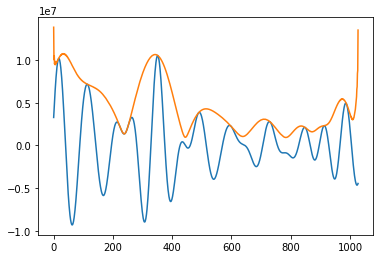

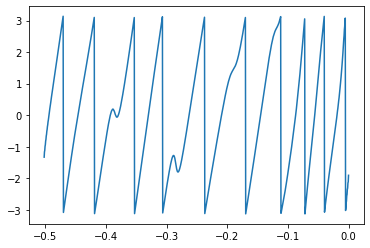

In [580]:
hilb = signal.hilbert(filtered_beta)
plt.plot(filtered_beta)
plt.plot(np.abs(hilb))
phase = np.unwrap(np.angle(hilb))
phase = np.angle(hilb)
plt.figure()
plt.plot(df['time'][-len(phase):]/1000, phase)

In [583]:
df[df['time'] == 0]

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,PO4,PO6,FT7,FT8,TP7,TP8,PO7,PO8,Oz,time
2047,380.029755,390.324677,402.013367,380.953186,406.640442,377.266266,375.748749,422.201111,371.736572,370.793976,...,355.407928,356.506897,396.083893,434.670166,374.812012,354.968994,374.710358,365.040924,369.064209,0.0


/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


-93.3537137949552

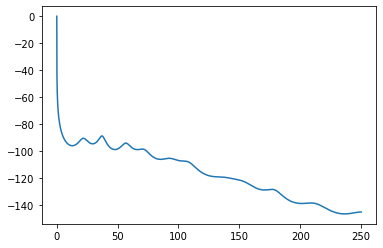

In [604]:
def get_power(channel, time, band, fs=500):
    # Resample
    ts = time[1] - time[0]
    secs = len(channel) * ts
    secs = int(secs/1000)
    resampled = signal.resample(channel, secs*fs)
    resampled_time = np.linspace(time[0], time[-1], len(resampled))
    
    # PSD estimation
    ar, _, _ = arburg(resampled, 26)
    psd = arma2psd(ar, sides='centerdc')
    psd = PSD/np.linspace(-250, 250, len(psd))
    psd = 10 * pylab.log10(psd/max(psd))
    df_power = pd.DataFrame(psd, columns=['psd'])
    df_power['freq'] = np.linspace(-250, 250, len(psd))
    
    plt.plot(df_power['freq'], df_power['psd'])

    # Average power across band
    return np.mean(df_power[(df_power['freq'] > band[0]) * (df_power['freq'] <= band[1])]['psd'].values)

get_power(df['FC5'], df['time'].values, [13, 30])

In [600]:
def get_phase(channel, time, band, N=1023):
    filtered_band = blackman_harris(channel.values, time, N, [0.00001, band[0]])
    filtered_band = blackman_harris(filtered_band, time, N, band[1])
    time = time[-len(filtered_band):].values
    hilb = signal.hilbert(filtered_band)
    phase = np.unwrap(np.angle(hilb))
    phase = np.angle(hilb)
    phase_df = pd.DataFrame(phase, columns=['phase'])
    phase_df['time'] = time
    return phase_df[phase_df['time'] == 0]['phase']
    
get_phase(df['FC5'], df['time'], [12.99999, 30])

1027   -1.906456
Name: phase, dtype: float64

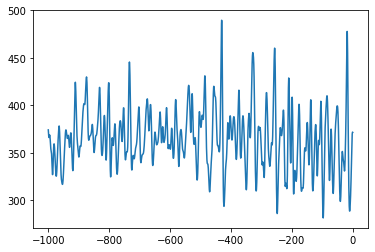

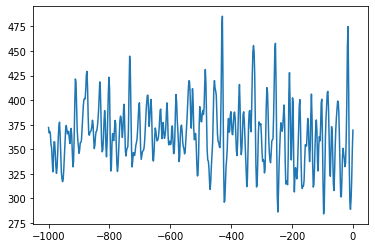

In [525]:
# Resample
ts = df['time'][1] - df['time'][0]
secs = len(df[channel])*ts
secs = int(secs/1000)
resampled = signal.resample(df[channel], secs*500)
resampled_time = np.linspace(df['time'][0], df['time'].values[-1], len(resampled))

plt.plot(df['time'], df[channel])
plt.figure()
plt.plot(resampled_time, resampled)

[0, 250, -130, 0]

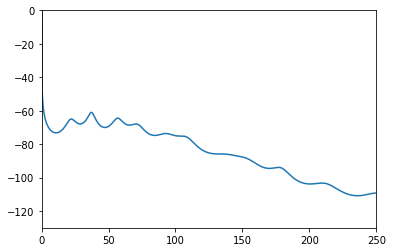

In [536]:
# Power estimation
AR, P, k = arburg(resampled, 26)
PSD = arma2psd(AR, sides='centerdc')
plt.plot(np.linspace(-250, 250, len(PSD)), 10*pylab.log10(PSD/max(PSD)))
plt.axis([0, 250, -130, 0])

In [541]:
psd2 = PSD/np.linspace(-250, 250, len(PSD))

/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


[0, 250, -160, 0]

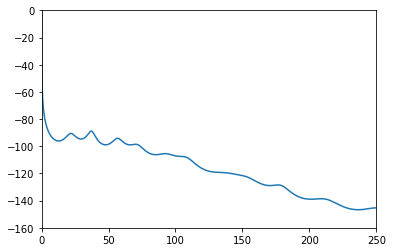

In [544]:
# Power estimation
plt.plot(np.linspace(-250, 250, len(psd2)), 10*np.log10(psd2/max(psd2)))
plt.axis([0, 250, -160, 0])